# Gerekli Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import datasets

seed = 42
np.random.seed(seed)

# Veri Seti

In [2]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    random_state=seed
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# Lasso Regression

In [4]:
class LassoRegression:
    def __init__(self, alpha=1.0, lr=0.01, n_iters=1000):
        # Ceza terimi (L1 Regularization)
        self.alpha = alpha
        # Ogrenme orani (learning rate)
        self.lr = lr
        # Iterasyon sayisi
        self.n_iters = n_iters
        # Agirliklar
        self.W = None
        # Bias
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Agirliklar 0 ile doldurulur.
        self.W = np.zeros(n_features)
        # Bias 0 ile baslanir.
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.W) + self.b

            # Gradyanlar hesaplanir.
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + self.alpha * np.sign(self.W)
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Agirlik ve bias guncellenir.
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.W) + self.b
        return y_pred

# Eğitim

In [5]:
lasso = LassoRegression()
lasso.fit(X_train, y_train)

# Tahmin

In [6]:
y_pred = lasso.predict(X_test)

In [7]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.9746205231949815


In [8]:
print("MSE Score:", mean_squared_error(y_test, y_pred))

MSE Score: 156.43232697345653


# Sonuçlar

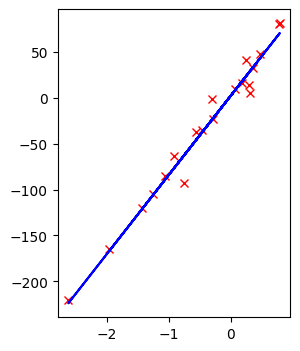

In [9]:
plt.figure(figsize=(3, 4))
plt.plot(X_test, y_test, "rx")
plt.plot(X_test, y_pred, "b")
plt.show()

# Scikit-Learn

In [10]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [11]:
y_pred_2 = lasso.predict(X_test)

In [12]:
print("R^2 Score:", r2_score(y_test, y_pred_2))

R^2 Score: 0.9746172845583194


In [13]:
print("MSE Score:", mean_squared_error(y_test, y_pred_2))

MSE Score: 156.45228906618098
